# SLU07 - Regression With Linear Regression: Exercise notebook

In the learning notebook we have presented you with several new concepts. 

With this exercise notebook we want to take a closer look to some of the formulas we introduced in the learning notebook and also expect to understand the concepts from a more practical experience.

Let's dive right into it and enjoy the ride!

![ride](assets/ride.gif)

In [1]:
# Base imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hashlib

np.random.seed(42)

## Exercise 1 - Simple Linear Regression

As a first exercise, let's imagine you're thinking about changing your career and now you want to become a full-time blogger (I know that in these days, bloggers are not a thing but let's assume it is).


![blog](assets/blog.gif)

Although being a full-time blogger seems to be a lot of fun, you need to have a sense of how much money you will make with the blog so you can manage your financial life. 

After doing some online research, you then find income reports that full-time bloggers have published and you put that information into a spreadsheet. This spreadsheet has information about the number of months of experience and the amount of money earned.

You will use this dataset to predict approximately how much money can be earned based on the number of months of experience blogging.

You probably already have a hunch that, the older a blog is, the more money it makes, but by using linear regression you’ll be able to support or refute this hypothesis with actual data. You know, the kind of data you can take to the bank.


In [2]:
df_blog = pd.read_csv('data/blogging_income.csv')
df_blog.head()

,MonthsExperience,Income
0,3,424
1,3,387
2,3,555
3,4,590
4,4,533


Let's start by visualizing the data:

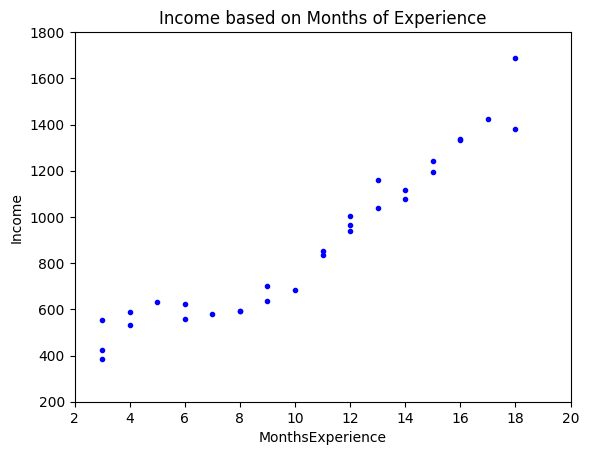

In [3]:
df_blog = df_blog.sort_values('MonthsExperience')
plt.xlim((2, 20))
plt.ylim((200, 1800))
plt.xlabel('MonthsExperience')
plt.title('Income based on Months of Experience')
plt.ylabel('Income')
plt.plot(df_blog['MonthsExperience'], df_blog['Income'], 'b.')
plt.show()

### Exercise 1.1 - Simple Linear Model

As you can see, our data has only one variable ($x$: 'Months of Experience') and one label ($y$: 'Income'), so we can try to fit it with a simple linear regression. This model is represented by the following expression:

$$\hat{y} = \beta_0 + \beta_1 x$$

where $\hat{y}$ are the predictions, $\beta_0$ is the intercept, $\beta_1$ is the coefficient and $x$ is the input sample. Expanding to several samples, we can write this equation in a vector form:

$$\vec{\hat{y}} = \beta_0\vec{1} + \beta_1 \vec{x}$$

In this exercise, we would like you to implement the function <em>simple_linear_regression</em>, which should compute the output of the above equation:

In [4]:
def simple_linear_regression(x, betas):
    """
    Args:
        x : numpy.array with shape (num_samples,) - The input data 
        betas: numpy.array with shape (2,) - The weights of the model [b_0, b_1]
    
    Returns:
        f1, f2 : numpy.array with shape (num_samples,) - intermediate calculations
        y_hat : list (lenght = (num_samples)) - The prediction made by 
                the simple linear regression.
    """

    
    b_0=float(betas[0])
   
    b_1=float(betas[1])
    
    # Let's begin with the first term of the equation
    f1 = np.full(len(x),b_0)
    
    # Now, the second term
    f2 = b_1*x

    # Now let's sum the two terms of the equation and convert to a list
    y_hat =list(f1+f2)
    
    return f1, f2, y_hat


Check if your solution is an approximate of the true solution for the following tests:

In [5]:
# Simple test
f1_1, f2_1, y_hat1 = simple_linear_regression(np.arange(0, 5), np.array([-15, 20]))
expected_hash_1 = 'ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d'
expected_hash_2 = 'b63d2b235e273730eda06df31b5d8c0f4c73eec62deb0a3937bc3540384d6a26'
expected_hash_3 = '981a391f15355b5d3f9fa774f7e5e2080b001ddf5e358b2b18c1066ce44dbd9e'
assert hashlib.sha256(str(len(f1_1)).encode('utf-8')).hexdigest() == expected_hash_1, "Perhaps your f1 variable is not well calculated!"
assert hashlib.sha256(str(f1_1[-1]).encode('utf-8')).hexdigest() == expected_hash_2, "Make sure to use the beta_0 and the right dimension of x "
assert hashlib.sha256(str(f1_1[0]).encode('utf-8')).hexdigest() == expected_hash_2, "Make sure to use the beta_0 and the right dimension of x"
assert hashlib.sha256(str(len(f2_1)).encode('utf-8')).hexdigest() == expected_hash_1, "Perhaps your f2 variable is not well calculated!"
assert hashlib.sha256(str(type(y_hat1)).encode('utf-8')).hexdigest() == expected_hash_3, "Pay attention to the type of the output"
np.testing.assert_array_almost_equal(y_hat1, np.array([-15.0, 5.0, 25.0, 45.0, 65.0]))

# Test using our dataset
f1_2, f2_2, y_hat2 = simple_linear_regression(df_blog['MonthsExperience'],np.array([3.0, 2.5]))
expected_hash_4 = '624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da576068201b6c6958ce93f4'
expected_hash_5 = 'a416ea84421fa7e1351582da48235bac88380a337ec5cb5a9239dc7d57908b4b'
expected_hash_6 = '981a391f15355b5d3f9fa774f7e5e2080b001ddf5e358b2b18c1066ce44dbd9e'
assert hashlib.sha256(str(len(f1_2)).encode('utf-8')).hexdigest() == expected_hash_4, "Perhaps your f1 variable is not well calculated!"
assert hashlib.sha256(str(f1_2[-1]).encode('utf-8')).hexdigest() == expected_hash_5, "Make sure to use the beta_0 and the right dimension of x "
assert hashlib.sha256(str(f1_2[0]).encode('utf-8')).hexdigest() == expected_hash_5, "Make sure to use the beta_0 and the right dimension of x"
assert hashlib.sha256(str(len(f2_2)).encode('utf-8')).hexdigest() == expected_hash_4, "Perhaps your f2 variable is not well calculated!"
assert hashlib.sha256(str(type(y_hat2)).encode('utf-8')).hexdigest() == expected_hash_6, "Pay attention to the type of the output"
np.testing.assert_array_almost_equal(np.array(y_hat2)[[2,8,11,15,20, 23]].tolist(), 
   [10.5, 20.5, 25.5, 30.5, 35.5, 40.5])



Now that you have a function to construct the model, the next step is to discover the values of the betas.

The first approach you can take is to implement the closed form solution. That is, solving the equation that minimizes the error across all of the samples - ordinary least squares. For that, however, we need to understand what the error trying to be minimised is. Let's take a look at the cost function you have learned:

### Exercise 1.2 Cost Function

Start by implementing the cost function presented - mean squared error:

$$J = \frac{1}{N} \sum_{n=1}^N e_i^2 = \frac{1}{N} \sum_{n=1}^N (y_i - \hat{y_i})^2$$

where the error, $e$, is the difference between your predictions and the actual sample value.

In [6]:
def cost_function(y, y_hat):
    """
    Args: 
        y : numpy.array with shape (num_samples, ) - real target
        y_hat : numpy.array  with shape (num_samples, ) - predicted target
    
    Returns:
        mean_squared_error : float
    """
    
   
    error = np.subtract(y, y_hat)
   
   
    
    squared_error = pow(error,2)
    
   
    
    
    # Finally, take the mean and return the mean sqared error
    mean_squared_error = 1/(len(y)) * sum(squared_error)
  
    
    return mean_squared_error


Check that your solution is an approximate of the true solution for the following tests:

In [7]:
# Simple tests
np.testing.assert_almost_equal(cost_function(np.array([.24]), np.array([.36])), 0.0144)
np.testing.assert_almost_equal(cost_function(np.array([1.13]), np.array([2.65])), 2.3104)

# Test using our dataset
x_rnd = df_blog['MonthsExperience'].values
y_rnd = df_blog['Income'].values
beta_rnd = np.array([120, 120])
_, _,y_hat_rnd = simple_linear_regression(x_rnd, beta_rnd)

np.testing.assert_almost_equal(cost_function(y_rnd, y_hat_rnd), 294785.2)

In [8]:
cost_function(y_rnd, y_hat_rnd)

294785.2

As you can see from the previous test, picking just random values for our weights will probably yield very high error values. You can even visualize this to see that, in fact, these random weights don't fit our data:

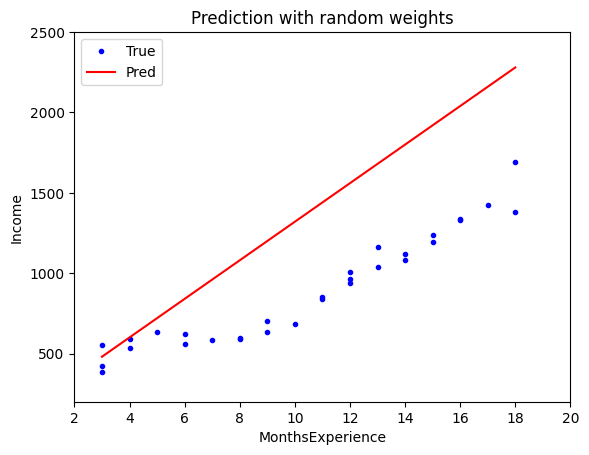

In [9]:
plt.xlim((2, 20))
plt.ylim((200, 2500))
plt.xlabel('MonthsExperience')
plt.ylabel('Income')
plt.title('Prediction with random weights')
plt.plot(df_blog['MonthsExperience'], df_blog['Income'], 'b.', label='True')
plt.plot(df_blog['MonthsExperience'], y_hat_rnd, 'r-', label='Pred')
plt.legend()
plt.show()

### Exercise 1.3 - Closed Form Solution

Lets then implement a closed form solution in order to get the optimal values for the betas. Remember that the solution to minimize the error can be written as:

$$ \beta_1 = \frac{\sum_{i}^{N}{(x_i - \bar{x})(y_i - \bar{y})}}{\sum_{i}^{N}{(x_i - \bar{x})^2}} = \frac{cov(x, y)}{var(x)}$$

where $cov(x,y)$ and $var(x)$ are, respectively, the covariance and variance of the samples, and

$$ \beta_0 = \bar{y} - \beta_1 \bar{x} $$ 

where $\bar{y} = \frac{1}{N}\sum_{i}^{N}{y_i}$ and $\bar{x} = \frac{1}{N}\sum_{i}^{N}{x_i}$ are the means of the sample.

Thus, complete the closed form solution below

In [10]:
def closed_form_solution(x, y):
    """
    Args: 
        x : numpy.array with shape (num_samples, ) - input samples 
        y : numpy.array with shape (num_samples, ) - sample labels
    
    Returns:
        b0: float
        b1: float
    """
    # The sample covariance and variance for 1-d arrays in 
    # numpy for this particular case are computed as follows
    # We covered this part so you don't lose too much time on these details
    cov_xy = np.cov(x, y, bias=True)[0][1]
    var_x = np.var(x)
    
    
    x_mean= x.mean()
    y_mean= y.mean()
    
    b1 = cov_xy/var_x
   
    
    # Compute intersect beta_0
    b0 = y_mean-b1*x_mean
   
    return b0, b1

Check that your solution is an approximate of the true solution for the following tests:

In [11]:
#Simple test
np.testing.assert_array_almost_equal(
    closed_form_solution(np.arange(0, 10), np.arange(0, 20, 2)),
    (0.0, 2.0)
)

np.testing.assert_array_almost_equal(
    closed_form_solution(np.arange(-2, 3), np.array([-1.5, -.56, .26, 1.3, 2.5])),
    np.array([.4, .986])
)

#Test using our dataset
x_cf = df_blog['MonthsExperience'].values
y_cf = df_blog['Income'].values
beta_cf = closed_form_solution(x_cf, y_cf)
y_hat_cf = simple_linear_regression(x_cf, beta_cf)[2]

np.testing.assert_array_almost_equal(cost_function(y_cf, y_hat_cf), 10170.468711301624)

You can also visualize how well your solution fits the given data:

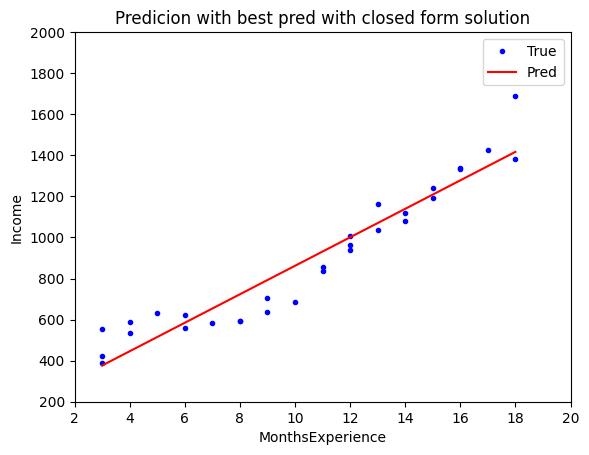

In [12]:
plt.xlim((2, 20))
plt.ylim((200, 2000))
plt.xlabel('MonthsExperience')
plt.ylabel('Income')
plt.title('Predicion with best pred with closed form solution')
plt.plot(df_blog['MonthsExperience'], df_blog['Income'], 'b.', label='True')
plt.plot(df_blog['MonthsExperience'], y_hat_cf, 'r-', label='Pred')
plt.legend()
plt.show()

### Exercise 1.4 - Final Answer

Let’s say you decide that you’re willing to give blogging 6 months of your time. After that point, if you’re not making any money you’ll call it quits. So, giving the model and the functions you already constructed, let's see how much money you can make with 6 months of blogging:


In [13]:
# We can use the same code of above to create the variables we need
x_simple = df_blog['MonthsExperience'].values
y_simple = df_blog['Income'].values

#x_simple = df_.index.values
#y_simple = df_['Income'].values

#Let's calculate the best coefficients
beta_simple = closed_form_solution(x_simple, y_simple)

# Now, let's calculate the predicted salary using one of the above functions we already implemented above
# Hint: If you don't remember the types/shapes of input/output of the function, it will be a good idea to check.
y_hat_simple = simple_linear_regression(x_simple[6:7], beta_simple)[2]



print('After 6 months in blogging, you will make: {} €'.format(round(y_hat_simple[0], 2))) 


After 6 months in blogging, you will make: 584.44 €


In [14]:
assert isinstance(y_hat_simple, list)
np.testing.assert_array_almost_equal(cost_function(y_simple, y_hat_simple), 208116.67604822144)


![mission](assets/rich.gif)

-----------------

So, maybe blogging isn't a very profitable job in a short/medium-term, at least....

## Exercise 2. Multiple Linear Regression

In this section, we will expand what we learned to a linear regression with multiple inputs - which we call features of our model. We will use a very specific scenario, so that we are able to visualize it better - we will try to model a polynomial function, in particular a cubic function, which can be written as:

$$\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^{2} + \beta_3 x^{3}$$

You will basically be considering each power of x as a different feature. To simplify, we are going to construct a dataset with the powers we want for this, so let's do it:

In [15]:
from sklearn.preprocessing import PolynomialFeatures

x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

In [16]:
data_ml = pd.DataFrame(x_poly, columns=['x1', 'x2', 'x3', 'x4']).drop(['x1'], axis=1)
data_ml.columns = ['x0', 'x1', 'x2']
data_ml['y'] = pd.DataFrame(y)[0]


data_ml.head()

,x0,x1,x2,y
0,0.509858,0.259955,0.132540,1.453164
1,2.414793,5.831225,14.081200,-5.884385
2,0.056934,0.003242,0.000185,-2.746872
3,-2.569090,6.600221,-16.956559,-31.522056
4,2.702460,7.303291,19.736852,-6.668844


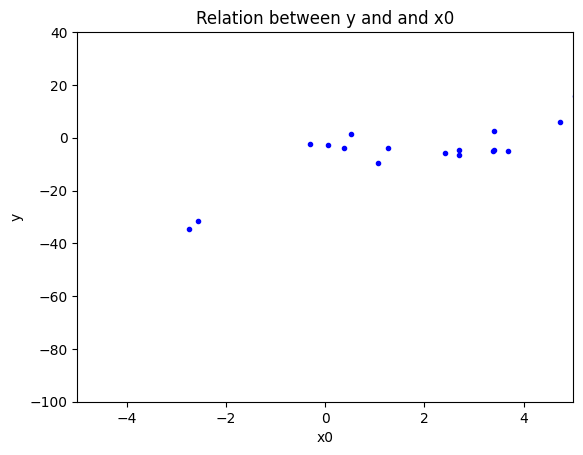

In [17]:
data_ml = data_ml.sort_values('x0')
plt.xlim((-5, 5))
plt.ylim((-100, 40))
plt.xlabel('x0')
plt.ylabel('y')
plt.title('Relation between y and and x0')
plt.plot(data_ml['x0'], data_ml['y'], 'b.')
plt.show()

Although this model is non linear in its features, notice that it is linear with respect to the weights, and the equation above can be rewritten as

$$\hat{y} = \beta_0 + \beta_1 x_0 + \beta_2 x_1 + \beta_3 x_2$$

where $[x_0, x_1, x_2]$ is our feature vector for a given sample.


### Exercise 2.1  Linear Model Extended

The multiple linear regression problem is just the linear regression problem on a linear model with several inputs. This model can be represented by the following expression:

$$\hat{y} = \beta_0 + \sum_{i=1}^K \beta_i x_i$$

We can also write it in matrix form to consider several samples, as before:

$$\vec{\hat{y}} = \beta_0\vec{1} + \vec{\beta_{1-k}}X^T$$

where X is now a matrix containing all features for all samples: 

$$ X = \begin{bmatrix} 
x_1^1 & x_1^2 & ... & x_1^k \\
x_2^1 & x_2^2 & ... & x_2^k \\
... & ... & ... & ...\\
x_n^1 & x_n^2 & ... & x_n^k \\
\end{bmatrix} $$

If you go back to the closed form solution you implemented before, you might notice that we had already used matrix form, in particular to concatenate our whole weight vector. We'll follow the same logic, and extend our matrix X to allow a column of ones:

$$ X' = [\vec{1} | X] $$

and rewrite:

$$\vec{\hat{y}} = \vec{\beta}(X')^T$$

Implement below this extended model.

Tip: You might want to review the learning notebook and examples to get used to the matrix handling in the following problems

In [113]:
def extended_linear_model(x, betas):
    """
    Args:
        x : numpy.array with shape (num_samples, num_features) - samples of our model
        betas : numpy.array with shape (num_features + 1,) - weights of 
                our model, with the intercept in the first position of 
                the array
    
    Returns:
        y_pred : list(len= (num_samples)) - prediction 
                made by the simple linear regression.
    """
    
    # We do the proper reshaping of weights so you don't have 
    # to worry about that and focus on the remaining logic
    betas = betas.reshape((1, -1))
    
    # Extend the matrix x with a column of ones
    
    array= np.full((1, len(x)), 1)
    array_reshaped = array.reshape(len(x),1)
    
    X_mat = np.concatenate((array_reshaped , x), axis=1)
   


    # Compute the output of the linear model
    y_pred =np.matmul(betas,(X_mat.transpose()))
    
    
    # Once again, we reshape your array to get the proper output
    return y_pred.flatten().tolist()


Since this is an extension of the simple linear model, it should be able to cover that use case also. Check that your solution still passes the test for the simple linear model:

In [114]:
# Simple test
np.testing.assert_array_almost_equal(
    extended_linear_model(np.arange(0, 10).reshape(-1, 1), np.array([-12, 30])), 
    [-12.,  18.,  48.,  78., 108., 138., 168., 198., 228., 258.])


np.testing.assert_array_almost_equal(
    extended_linear_model(np.arange(-5, 5).reshape(-1, 1), np.array([1, 1])), 
    [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]
)

np.testing.assert_array_almost_equal(
    extended_linear_model(np.arange(-10, 10, 2).reshape(-1, 1), np.array([0.25, 2.1])), 
    [-20.75, -16.55, -12.35, -8.15, -3.95, 0.25, 4.45, 8.65, 12.85, 17.05]
)

Now check if your solution passes the tests for the extended version:

In [20]:
np.testing.assert_array_almost_equal(
    extended_linear_model(np.array([[1., 2.], [3., 4.], [5., 6.]]), np.array([-1., 0., 1.])), 
    [1., 3., 5.]
)

np.testing.assert_array_almost_equal(
    extended_linear_model(np.ones((10, 2)), np.array([1., 2., 3.])), 
    [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.]
)

### Summed Squared Error

As before, we can use the summed squared error as our cost. However, since this function does not receive anything other than the predictions and true values, there is no need to reimplement it. As before, let's see how the model would behave and what would be its error if we pick random weights:

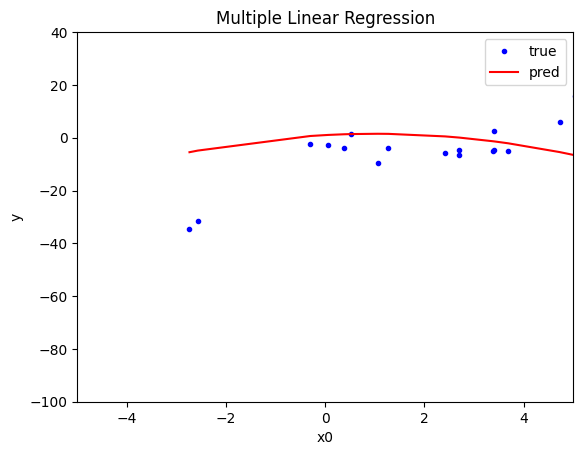

Error: 1773.6270396915643


In [21]:
# Error in our dataset with random weights
x_pln_rnd = data_ml['x0']
X_pln_rnd = data_ml.drop('y', axis=1).to_numpy()
y_pln_rnd = data_ml['y'].values
beta_pln_rnd = np.array([1., 1., -.5, 0.])
y_hat_pln_rnd = extended_linear_model(X_pln_rnd, beta_pln_rnd)

plt.xlim((-5, 5))
plt.ylim((-100, 40))
plt.xlabel('x0')
plt.ylabel('y')
plt.title('Multiple Linear Regression')
plt.plot(x_pln_rnd, y_pln_rnd, 'b.', label='true')
plt.plot(x_pln_rnd, y_hat_pln_rnd, 'r-', label='pred')
plt.legend()
plt.show()

print('Error: {}'.format(cost_function(y_pln_rnd, y_hat_pln_rnd))) 

As you can see, the solution is clearly not a fit and the error is very high. So let's move into our closed form solution.

### Exercise 2.2 - Closed Form Solution

Let's now implement the closed form solution for the generic case. When put into matrix form, remember that the solution to minimize the error can be written as:

$$ \vec{\beta} = (X^TX)^{-1}(X^T\vec{y})$$


where X is our matrix of samples extended to add a 1 component in each sample, $X = [\vec{1} | X] $ , $\vec{y}$ is the output vector, and $\vec{\beta}$ the weight vector with weights $\beta_0$ and $\beta_1$

Implement the closed form solution for the multiple linear regression problem below

In [22]:
def extended_closed_form_solution(x, y):
    """
    Args: 
        x : numpy.array with shape (num_samples, num_features) - samples of our model
        y : numpy.array with shape (num_samples, ) - sample labels
    
    Returns:
        betas : list (len= (num_features + 1)) - weight vector 
    """ 
    
    # Proper reshaping of the labels
    y = y.reshape((-1, 1))

    # Extend vector of samples with array of ones
    
    array= np.full((1, len(x)), 1)
    array_reshaped = array.reshape(len(x),1)
    
    X = np.concatenate((array_reshaped , x), axis=1)
    
    X_t= X.transpose()
    # Compute betas
    betas = np.matmul( np.linalg.inv(np.matmul(X_t, X)) , np.matmul(X_t, y ))
    
    # Once again, we reshape your array to get the proper output
    return betas.flatten().tolist()


Check that your solution is an approximate of the true solution for the following tests:

In [23]:
# Old tests
np.testing.assert_array_almost_equal(
    extended_closed_form_solution(np.arange(0, 10).reshape(10, 1), np.arange(0, 20, 2).reshape(10, 1)),
    [0., 2.]
)

np.testing.assert_array_almost_equal(
    extended_closed_form_solution(np.arange(-2, 3).reshape(5, 1), np.array([-1.25, -.5, .25, 1., 1.75]).reshape(5, 1)),
    [.25, .75]
)


# Extended test cases
np.testing.assert_array_almost_equal(
    extended_closed_form_solution(np.array([[1., -1.], [2., 1.], [3., -5.]]), np.array([0., 1., 0.])), 
    [-0.25, 0.5, 0.25]
)


np.testing.assert_array_almost_equal(
    extended_closed_form_solution(np.array([[10., -2.], [-4., 5.], [-7., -8.]]), np.array([2., 1., -.5])), 
    np.array([1.019704, 0.115764, 0.08867])
)


Now apply it to our dataset to get the best weights and measure the error across the dataset:

In [24]:
x_pln_cf = data_ml['x0'].values
y_pln_cf = data_ml['y'].values

# All columns except y
X_pln_cf = data_ml.drop('y', axis=1).to_numpy()

beta_pln_cf = extended_closed_form_solution(X_pln_cf, y_pln_cf)
y_hat_pln_cf = extended_linear_model(X_pln_cf, np.array(beta_pln_cf))

assert math.isclose(cost_function(y_pln_cf, y_hat_pln_cf), 7.159451499759534), "Check your closed form function!"

Finally, we'll try to see how well this solution fits the data:

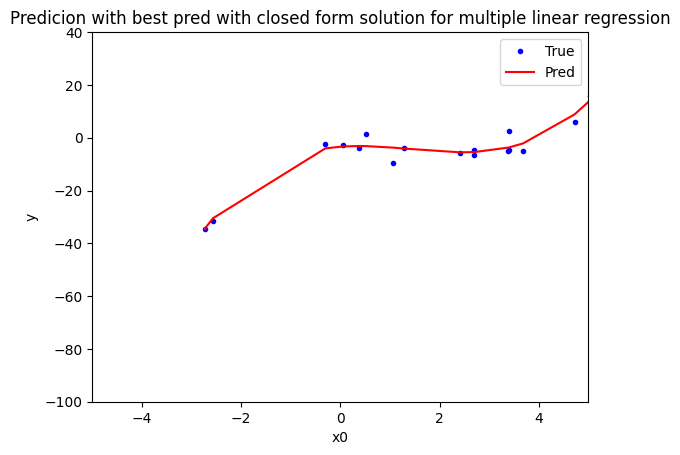

In [25]:
plt.xlim((-5, 5))
plt.ylim((-100, 40))
plt.xlabel('x0')
plt.ylabel('y')
plt.title('Predicion with best pred with closed form solution for multiple linear regression')
plt.plot(x_pln_cf, y_pln_cf, 'b.', label='True')
plt.plot(x_pln_cf, y_hat_pln_cf, 'r-', label='Pred')
plt.legend()
plt.show()

Much better! You have a much better fit.

![reaction](assets/reaction.gif)

## Exercise 3 . ScikitLearn Linear Regression

Luckily, ScikitLearn already provides us with a solver for the Linear Regression problem, which implements a closed form solution internally. It also provides already some extra info on the regression, such as the $R^2$ score. 
 
For this exercise, we'll be using the Boston housing dataset and try to model the house pricing through the provided features. Start by loading and looking into the dataset:

In [26]:
data = pd.read_csv('data/boston (scaled).csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [27]:
# All features except house price
columns_housing = data.drop('MEDV', axis=1)
x_housing = columns_housing.to_numpy()

# House price 
y_housing = data['MEDV'].to_numpy()

In [28]:
x_housing

array([[-0.41771335,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41526932, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41527165, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41137448, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40568883, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41292893, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [29]:
x= x_housing
x.reshape(-len(x_housing), len(x))

array([[-0.41771335,  0.28482986, -1.2879095 , ..., -0.76757602,
         0.34421334,  0.40300561],
       [-0.35366732, -0.41523206,  2.73124524, ..., -0.52300145,
        -0.06080135,  0.1130321 ],
       [ 0.33206621, -0.33404299, -0.41187517, ..., -0.50624089,
        -0.40804109,  0.14113426],
       ...,
       [-0.27259857,  1.25519204, -1.27454864, ...,  0.26169559,
         0.43936012, -0.48772236],
       [ 1.01599907, -0.27259857,  1.07378711, ..., -3.66937637,
         0.63035264,  0.09647088],
       [-0.48772236,  1.01599907, -0.27259857, ...,  1.17646583,
         0.44105193, -0.66905833]])

Each of the columns in the table is one of the features our model is going to use, that is, one of the inputs we are going to give it. Use the `sklearn.linear_model.LinearRegression` module that you've learned and implement it in the function below.

In [30]:
from sklearn.linear_model import LinearRegression

def sklearn_model_regression(x, y):
    """
    
    Args: 
        x: numpy.ndarray with shape (num_samples, num_features) - samples of our model
        y: numpy.array with shape (num_samples, ) - sample labels
        
    Return:
        coefs: list (len= (num_features) - coefficients vector
        intercept: float - intercept value
        score: float - R squared score of regression
    """
    
    # Fit the linear regressor
    lr = LinearRegression()
    lr.fit(x,y)
    
    # Extract the coefficients
    coefs = lr.coef_

    
    # Extract the intercept
    intercept = lr.intercept_

    
    # Calculate the score
    score = lr.score(x, y)


    return coefs, intercept, score

Let's see then what our coefficients are for each of the features.

In [31]:
coefs_housing, intercept_housing, score_housing = sklearn_model_regression(x_housing, y_housing)

print('Feature coefficients: ')
print(pd.Series(coefs_housing, columns_housing.columns))
print('\n')

print('Intercept: {}'.format(intercept_housing))
print('\n')

print('R² score: {}'.format(score_housing))

Feature coefficients: 
CRIM      -0.920411
ZN         1.080981
INDUS      0.142967
CHAS       0.682203
NOX       -2.060092
RM         2.670641
AGE        0.021121
DIS       -3.104448
RAD        2.658787
TAX       -2.075898
PTRATIO   -2.062156
B          0.856640
LSTAT     -3.748680
dtype: float64


Intercept: 22.532806324110684


R² score: 0.7406077428649428


Finally, check that your solution is an approximate of the true solution for the following tests:

In [32]:
betas_housing = np.concatenate((np.array([intercept_housing]), np.array(coefs_housing)), axis=0)

np.testing.assert_array_almost_equal(
    extended_linear_model(x_housing[:10], betas_housing),
    np.array([30.00821269, 25.0298606, 30.5702317, 28.60814055, 27.94288232, 
              25.25940048, 23.00433994, 19.5347558, 11.51696539, 18.91981483])
)

np.testing.assert_array_almost_equal(
    extended_linear_model(x_housing[-10:], betas_housing),
    np.array([14.01017244, 19.10825534, 21.29720741, 18.45524217, 20.46764235, 
              23.53261729, 22.37869798, 27.62934247, 26.12983844, 22.34870269])
)

y_hat_housing = extended_linear_model(x_housing, betas_housing)
assert math.isclose(cost_function(y_housing, y_hat_housing), 21.8977792176875)

We can also use this model to get to the solution for our previous problems. Run the cells below and see the scikitlearn solution.

Your co-worker was giving you some hints to help you in this last task. She is very nice and helpful and she suggests that you try a more generic method - the Gradient Descent! You've heard of it, so, although you are very tired already, you give it a chance! 

Last one before you go home!


![tired](assets/tired.gif)

## Exercise 4. Gradient Descent

Now we will see how to get to a similar solution through learning/optimization methods. In this section, you will implement gradient descent. This method is an iterative process that updates the weights in the direction that minimizes our error. For this, it makes use of derivatives according to the following formula:

$$ \vec{\beta}_{i+1} = \vec{\beta}_i - \eta \Delta_\vec{\beta} J$$

where $\Delta_\vec{\beta}$ is the vector of the derivatives - also called gradients - of our error function with respect to the weights, $\beta_{i+1}$ is the updated weight and $\beta_{i}$ the current weight. Therefore, we need to be able to compute these gradients to be able to update the weights.


### Multiple Linear Regression partial derivatives

The vector $\Delta_\vec{\beta}$ in the formula above is just a vector with the partial derivatives of the error function with respect to each of the weights. The formulas for these partial derivatives with respect to each weight are defined as follows:

$$\frac{\partial J}{\partial b_0} = - \frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n) $$

$$\frac{\partial J}{\partial b_1} = - \frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n)x_{1_n} $$

$$...$$

$$\frac{\partial J}{\partial b_K} = - \frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n)x_{K_n} $$

Since the focus of this notebook is for you to implement the methods to solve linear regression, and you already have quite some work, we'll solve this one for you. Check below the code for the derivatives:

In [33]:
def linear_regression_partial_derivatives(x, y, y_hat):
    """
    Args:
        x : numpy.array with shape (num_samples, num_features) - samples of our model
        y : numpy.array with shape (num_samples,) - sample labels
        y_hat : numpy.array with shape (num_samples,) - predicted labels
    
    Returns:
        deltas : pandas.Series shape (num_features + 1,)
            
    """    

    # Compute the difference between the targets and the predictions.
    y_diff = y - y_hat
    
    # Initialize the numpy array of partial derivatives
    deltas = np.zeros((x.shape[1] + 1, ))
    
    # Compute the partial derivative for b0
    deltas[0] = -(2 * y_diff).mean()
    
    # Extract the partial derivatives of the remaining betas  
    for col in range(x.shape[1]): 
        deltas[col+1] = -((2 * y_diff) * x[:, col]).mean()
    
    
    return deltas

### Exercise 4.1 Adjusting  parameters with gradient descent

Now we want to adjust the weights with the update rule we presented:

$$ \vec{\beta}_{i+1} = \vec{\beta}_i - \eta \Delta_\vec{\beta} J$$

where $\eta$ is our learning rate - how fast we want to move in the direction of the gradient. We will be implementing the standard gradient descent, also know as batch gradient descent, where for each iteration we will compute the derivatives by taking in all the dataset:

1. _For epoch in 1...epochs:
    1. Predict the outputs with current weights $\hat{y} = \vec{\beta}_i X$
    2. $\Delta_{\beta_0} = \frac{1}{N} \sum_{n=1}^N 2 (y - \hat{y})$
    3. $\Delta_{\beta_{i=1...N}} = \frac{1}{N} \sum_{n=1}^N 2 (y - \hat{y})x_{i_n} $
    4. $\beta_i = \beta_i - \eta \Delta_{\beta_i}$

Notice that you can get the gradients in steps A, B and C with the function implemented above. 

The number of epochs and learning rate will impact how fast and how good the solution we converge to. Besides the number of epochs, there are more clever ways of knowing when to stop this procedure, but, for simplicity, we will only use this one here.

Implement this gradient descent function below:

In [119]:
def linear_regression_gradient_descent(x, y, betas, learning_rate, epochs): 
    """
    Args:
        x : numpy.array with shape (num_samples, num_features) - samples of our model
        y : numpy.array with shape (num_samples,)  - sample labels
        betas : numpy.array with shape (num_features + 1,) - initial weights
        learning_rate : float - factor that will define the size of update step
        epochs : int - number of times to run full dataset

    Returns:
        betas : list (len= (num_features + 1)) - final weights after algorithm
            
    """    

    for epoch in range(epochs): 

        # Compute estimates for this iteration 
        y_hat= extended_linear_model(x,betas)

        # Compute the partial derivatives of the error function 
        # (hint: check linear_regression_partial_derivatives)
        deltas= linear_regression_partial_derivatives(x,y,y_hat)
        
        

        # Update betas with Gradient Descent rule 
        betas = betas - learning_rate*deltas
        
        
    
    return betas.tolist()

Check that your solution is an approximate of the true solution for the following tests:

In [120]:
np.random.seed(42)
betas = np.random.rand(x_housing.shape[1] + 1)
learning_rate = 0.1
epochs = 10

betas_ = linear_regression_gradient_descent(x_housing, y_housing, betas, learning_rate, epochs)
np.testing.assert_array_almost_equal(
    betas_, 
    np.array([
        20.1536, -0.391 ,  0.7281, -0.1594,  0.9096, -0.4351,  3.3176,
        0.2957, -0.9711,  0.5549, -0.8421, -1.4982,  1.0387, -3.0292]), 
    decimal=4)


np.random.seed(84)
betas = np.random.rand(x_housing.shape[1] + 1)
learning_rate = 0.1
epochs = 1

betas_ = linear_regression_gradient_descent(x_housing, y_housing, betas, learning_rate, epochs)
np.testing.assert_array_almost_equal(
    betas_, 
    np.array([ 4.5434, -0.4652,  0.9789, -0.4454,  1.1187, -0.7988,  1.5215,
       -0.581 ,  0.9902, -0.7336, -0.745 , -0.5769,  1.5129, -1.1906]), 
    decimal=4)

In order to compare the coefficients between the closed form solution and the result from sklearn model, run the following cells:

In [121]:
#Read Dataset
data = pd.read_csv('data/boston (scaled).csv')

columns_housing = data.drop('MEDV', axis=1)
x_housing = columns_housing.to_numpy()
y_housing = data['MEDV'].to_numpy()


np.random.seed(42)
betas = np.random.rand(x_housing.shape[1] + 1)
learning_rate = 0.1
epochs = 200

betas_ = linear_regression_gradient_descent(x_housing, y_housing, betas, learning_rate, epochs)
coefs_housing, intercept_housing, score_housing = sklearn_model_regression(x_housing, y_housing)

intercept_housing_sgd = betas_[0]
coefs_housing_sgd = betas_[1:]

series_sgd = pd.Series(coefs_housing_sgd, columns_housing.columns, name='SGD')
series_ols = pd.Series(coefs_housing, columns_housing.columns, name='OLS')

print('Feature coefficients: ')
print(pd.concat([series_sgd, series_ols], axis=1))
print('\n')

print('Intercept SGD: {}'.format(intercept_housing_sgd))
print('\n')

print('Intercept OLS: {}'.format(intercept_housing))
print('\n')

Feature coefficients: 
              SGD       OLS
CRIM    -0.910210 -0.920411
ZN       1.063046  1.080981
INDUS    0.088910  0.142967
CHAS     0.689895  0.682203
NOX     -2.047994 -2.060092
RM       2.681020  2.670641
AGE      0.012482  0.021121
DIS     -3.106294 -3.104448
RAD      2.522216  2.658787
TAX     -1.921710 -2.075898
PTRATIO -2.056564 -2.062156
B        0.855731  0.856640
LSTAT   -3.743365 -3.748680


Intercept SGD: 22.532806324110673


Intercept OLS: 22.532806324110684




This is it! The end of your first day and the end of this learning unit! 


![sum](assets/sum.gif)